In [1]:
import os

In [2]:
%cd drive/MyDrive/AI_ML_CLass/upgrad/PROJETS/

/content/drive/MyDrive/AI_ML_CLass/upgrad/PROJETS


In [3]:
!ls

aus_housing_price_data_description.txt
Aus-Housing-price.ipynb
aus_housing_pricing.csv
bike_sharing.csv
bike-sharing-data-dict.txt
Bike-Sharing-Linear-Regression.ipynb
Lending-Case-Study-EDA.ipynb
lending_loan_data_dictionary.xlsx
Linear_Regression_Subjective_Questions.pdf
loan.csv
telecom_churn_data_dictionary.csv
Telecom-churn-Forecasting.ipynb
telecom_churn_test_solution.csv
telecom_churn_train.csv
telecome_churn_test.csv


### Importing Libs

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings('ignore')

### Loading Churn Train Data & get into insight data :

In [5]:
churn_df=pd.read_csv('telecom_churn_train.csv')

In [6]:
churn_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [7]:
churn_df.shape

(69999, 172)

In [8]:
# data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [9]:
# displaying columns with class type
churn_df.dtypes

id                            int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            

In [10]:
# disription of churn columns
with open("telecom_churn_data_dictionary.csv","r") as f :
  for nl in f.readlines() :
    print(nl)

Acronyms,Description

CIRCLE_ID,Telecom circle area to which the customer belongs to

LOC,Local calls  within same telecom circle

STD,STD calls  outside the calling circle

IC,Incoming calls

OG,Outgoing calls

T2T,Operator T to T ie within same operator mobile to mobile

T2M    ,Operator T to other operator mobile

T2O    ,Operator T to other operator fixed line

T2F    ,Operator T to fixed lines of T

T2C    ,Operator T to its own call center

ARPU    ,Average revenue per user

MOU    ,Minutes of usage  voice calls

AON    ,Age on network  number of days the customer is using the operator T network

ONNET   ,All kind of calls within the same operator network

OFFNET    ,All kind of calls outside the operator T network

ROAM,Indicates that customer is in roaming zone during the call

SPL   ,Special calls

ISD    ,ISD calls

RECH    ,Recharge

NUM    ,Number

AMT    ,Amount in local currency

MAX    ,Maximum

DATA    ,Mobile internet

3G    ,G network

AV    ,Average

VOL    ,Mobile i

In [11]:
dist_df=churn_df.describe().transpose()
dist_df

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


observation :

1. Data distribution is skew for almost all features columns. 
2. There are many features which having only an unique value. These column does not contribute in model building. We should need to drop those features.
3. we can also observer feature columns contain lot of outliers datapoints


### Data Cleaning : 

In [12]:
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(churn_df)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


#### Missing Value Treatment

In [13]:
# calculate percentage of missing value against each column

def missing_percetage(df) :
  percentage = df.isna().sum().sort_values(ascending=False)*100/df.shape[0]
  return pd.DataFrame({'features':percentage.index,'percentage':percentage.values})

missing_df=missing_percetage(churn_df).head(200)
missing_df.head(200)

,features,percentage
0,arpu_3g_6,74.902499
1,count_rech_2g_6,74.902499
2,night_pck_user_6,74.902499
3,arpu_2g_6,74.902499
4,date_of_last_rech_data_6,74.902499
5,total_rech_data_6,74.902499
6,av_rech_amt_data_6,74.902499
7,max_rech_data_6,74.902499
8,count_rech_3g_6,74.902499
9,fb_user_6,74.902499


obeservation : 

1.   More than 73% missing values has been found in each of 30 columns in dataset.
2.  There are around 122 columns which having missing values



In [14]:
# drop colums which having more than 73% missing value
drop_cols = missing_df[missing_df.percentage>73].features.to_list()
churn_df.drop(drop_cols,inplace=True,axis=1)
# shape after dropping columns
churn_df.shape

(69999, 142)

In [15]:
# removing date related missing value
cols = ['date_of_last_rech_8',
        'date_of_last_rech_7',
        'date_of_last_rech_6',
        'last_date_of_month_8',
        'last_date_of_month_7'
        ]
churn_df=churn_df.dropna(subset=cols,how='any')

In [16]:
# listing columns having missing value less than equal to 6% 
missing_df = missing_percetage(churn_df)
missing_df = missing_df[missing_df.percentage > 0.0 ]
missing_df.head(200)

,features,percentage
0,loc_og_t2c_mou_8,3.316400
1,isd_og_mou_8,3.316400
2,loc_og_mou_8,3.316400
3,std_og_t2m_mou_8,3.316400
4,std_og_t2f_mou_8,3.316400
5,loc_og_t2f_mou_8,3.316400
6,std_ic_t2f_mou_8,3.316400
7,std_ic_t2t_mou_8,3.316400
8,loc_og_t2m_mou_8,3.316400
9,std_og_t2c_mou_8,3.316400


In [17]:
# look into columns having missing value less than equal to 6% and greater than 0%
churn_df[missing_df.features.to_list()].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loc_og_t2c_mou_8,63758.0,1.438439,6.623298,0.0,0.0000,0.000,0.0000,351.83
isd_og_mou_8,63758.0,0.852881,30.108189,0.0,0.0000,0.000,0.0000,5681.54
loc_og_mou_8,63758.0,142.923404,246.651865,0.0,18.3100,65.240,168.9400,11039.91
std_og_t2m_mou_8,63758.0,91.429979,270.490839,0.0,0.0000,3.510,53.8600,13950.04
std_og_t2f_mou_8,63758.0,1.054962,7.737241,0.0,0.0000,0.000,0.0000,354.16
loc_og_t2f_mou_8,63758.0,3.690321,13.099604,0.0,0.0000,0.000,2.0600,588.29
std_ic_t2f_mou_8,63758.0,2.081837,16.039237,0.0,0.0000,0.000,0.0000,1394.89
std_ic_t2t_mou_8,63758.0,9.972515,52.636553,0.0,0.0000,0.000,4.1600,3423.39
loc_og_t2m_mou_8,63758.0,92.712035,153.126836,0.0,10.5300,41.635,111.5875,4961.33
std_og_t2c_mou_8,63758.0,0.000000,0.000000,0.0,0.0000,0.000,0.0000,0.00


observation :

1. Data Distribution of almost all columns are skew.
2. Major gap in value of mean and Median of all columns.So I will replace those missing value with median.
3. There are also some column which contain only zero or na value.Those columns are [std_og_t2c_mou_8,std_ic_t2o_mou_8,std_og_t2c_mou_6,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_og_t2c_mou_7,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou]
4. They are continuous features.

In [18]:
# droping columns which having only zero or nan value
cols=['std_og_t2c_mou_8','std_ic_t2o_mou_8','std_og_t2c_mou_6','std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7','std_og_t2c_mou_7','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']
churn_df.drop(columns=cols,axis=1,inplace=True)

In [19]:
# replacing rest of missing value with median
churn_df = churn_df.fillna(churn_df.median())

In [20]:
# checking missing value
churn_df.isna().sum()

id                      0
circle_id               0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_m

In [21]:
churn_df.shape

(65945, 133)

In [22]:
# dropping id 
churn_df.drop(columns=['id'],axis=1,inplace=True)
churn_df=churn_df.reset_index()

In [23]:
churn_df.drop(columns=['index'],axis=1,inplace=True)

### EDA :

In [24]:
churn_df.head()

,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,109,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,109,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,109,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44

In [25]:
# looking into date feature columns
## Listing Unique Value of each date  features
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
for col in date_cols :
  print(f"date feature colum {col} ==> ",churn_df[col].unique())

date feature colum last_date_of_month_6 ==>  ['6/30/2014']
date feature colum last_date_of_month_7 ==>  ['7/31/2014']
date feature colum last_date_of_month_8 ==>  ['8/31/2014']
date feature colum date_of_last_rech_6 ==>  ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' '6/8/2014' '6/6/2014' '6/16/2014'
 '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/7/2014' '6/2/2014'
 '6/1/2014' '6/3/2014' '6/10/2014' '6/5/2014' '6/9/2014' '6/4/2014']
date feature colum date_of_last_rech_7 ==>  ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014' '7/12/2014'
 '7/24/2014' '7/1/2014' '7/15/2014' '7/23/2014' '7/9/2014' '7/8/2014'
 '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014' '7/2/2014'
 '7/3/2014']
date fea

It is visible here, that column last date of month 6,7,8 have constant date.

In [26]:
# datetime conversion
for col in date_cols :
  churn_df[col]=pd.to_datetime(churn_df[col])

# creating new feature that tells gap b/w last date of particualr month and last recharge date for particular month in days
churn_df['last_rech_gap_month_6'] = (churn_df['last_date_of_month_6']-churn_df['date_of_last_rech_6']).astype('timedelta64[D]')
churn_df['last_rech_gap_month_7'] = (churn_df['last_date_of_month_7']-churn_df['date_of_last_rech_7']).astype('timedelta64[D]')
churn_df['last_rech_gap_month_8'] = (churn_df['last_date_of_month_8']-churn_df['date_of_last_rech_8']).astype('timedelta64[D]')

# drop date columns
churn_df.drop(columns=date_cols,axis=1,inplace=True)

print("shape after dropping date colums ",churn_df.shape)

shape after dropping date colums  (65945, 129)


In [27]:
# Numeric & Categorical feature for EDA

# Since It is binary classfication problem, so target column churn_probability does having two categorical value 0 and 1. 
# 1 meaning customer is going to churn and zero means 
target_col = 'churn_probability'
print(f"target column ---> {target_col}")

# categorical features 
cat_cols = ['circle_id']
print(f"Categorical Features ---> {cat_cols}")

# countinuous Features
num_cols = list(set(churn_df.columns) - set(['churn_probability','circle_id']))
print(f"Numerical Features ---> {num_cols}")

target column ---> churn_probability
Categorical Features ---> ['circle_id']
Numerical Features ---> ['aug_vbc_3g', 'monthly_2g_7', 'total_ic_mou_7', 'loc_ic_t2t_mou_6', 'monthly_3g_6', 'monthly_2g_6', 'sachet_2g_6', 'std_ic_mou_8', 'loc_og_mou_8', 'roam_og_mou_7', 'std_og_t2m_mou_6', 'onnet_mou_7', 'std_ic_mou_7', 'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'isd_ic_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_6', 'vol_3g_mb_7', 'jun_vbc_3g', 'loc_og_t2m_mou_6', 'roam_ic_mou_6', 'loc_og_mou_6', 'loc_og_t2t_mou_7', 'ic_others_8', 'total_rech_amt_6', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_6', 'last_day_rch_amt_6', 'monthly_3g_7', 'spl_ic_mou_6', 'sachet_2g_8', 'std_ic_t2f_mou_7', 'vol_2g_mb_6', 'loc_og_t2c_mou_6', 'monthly_2g_8', 'vol_3g_mb_8', 'std_ic_t2t_mou_8', 'onnet_mou_6', 'arpu_8', 'spl_og_mou_6', 'roam_og_mou_8', 'sachet_3g_8', 'roam_ic_mou_8', 'total_ic_mou_6', 'last_rech_gap_month_8', 'std_og_t2f_mou_6', 'sachet_3g_6', 'total_ic_mou_8', 'spl_og_mou_7', 'loc_og_t2m_mou_7', 'last_rech_gap_mo

In [28]:
# circle id
print("circle id unique values ==> ",churn_df.circle_id.value_counts())

churn_df.drop(columns=['circle_id'],axis=1,inplace=True)

print("shape after dropping circle_id column ==>",churn_df.shape)

circle id unique values ==>  109    65945
Name: circle_id, dtype: int64
shape after dropping circle_id column ==> (65945, 128)


Churn customer datapoints in percentage 8.256880733944953
-----------------


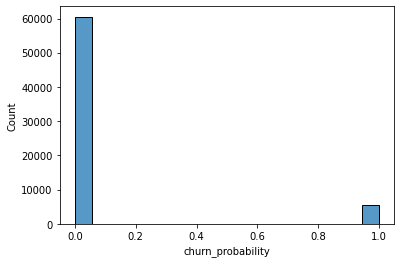

In [29]:
# check target column distribution
perc_churn_customer_datapoints = churn_df[churn_df.churn_probability==1].shape[0]*100/churn_df.shape[0]
print(f"Churn customer datapoints in percentage {perc_churn_customer_datapoints}")
print("-----------------")
sns.histplot(data=churn_df,x='churn_probability')

observation : 

1. Only 8.25% datapoints belong to positive churn.
2. It means It is a imbalanced classification problem

In [30]:
# null accuracy if we start saying all customer are in not churn category
churn_df[churn_df.churn_probability==0].shape[0]*100/churn_df.shape[0]

91.74311926605505

I will get 91.74 accuracy if I will categorize all datapoints as not churned. So It mean accuracy is not important matrix in model building process. 

In [31]:
def display_bulk_box_plot(df,num_cols,target_col,fig_size=(30,100)) :
  # box plot b/w target variable against different numerical columns
  plt.figure(figsize = fig_size)

  for i,col in enumerate(num_cols) :

      plt.subplot(44,3,i+1)
      sns.boxplot(x=target_col, y=col, data=df[[col,target_col]])
              
  plt.show()

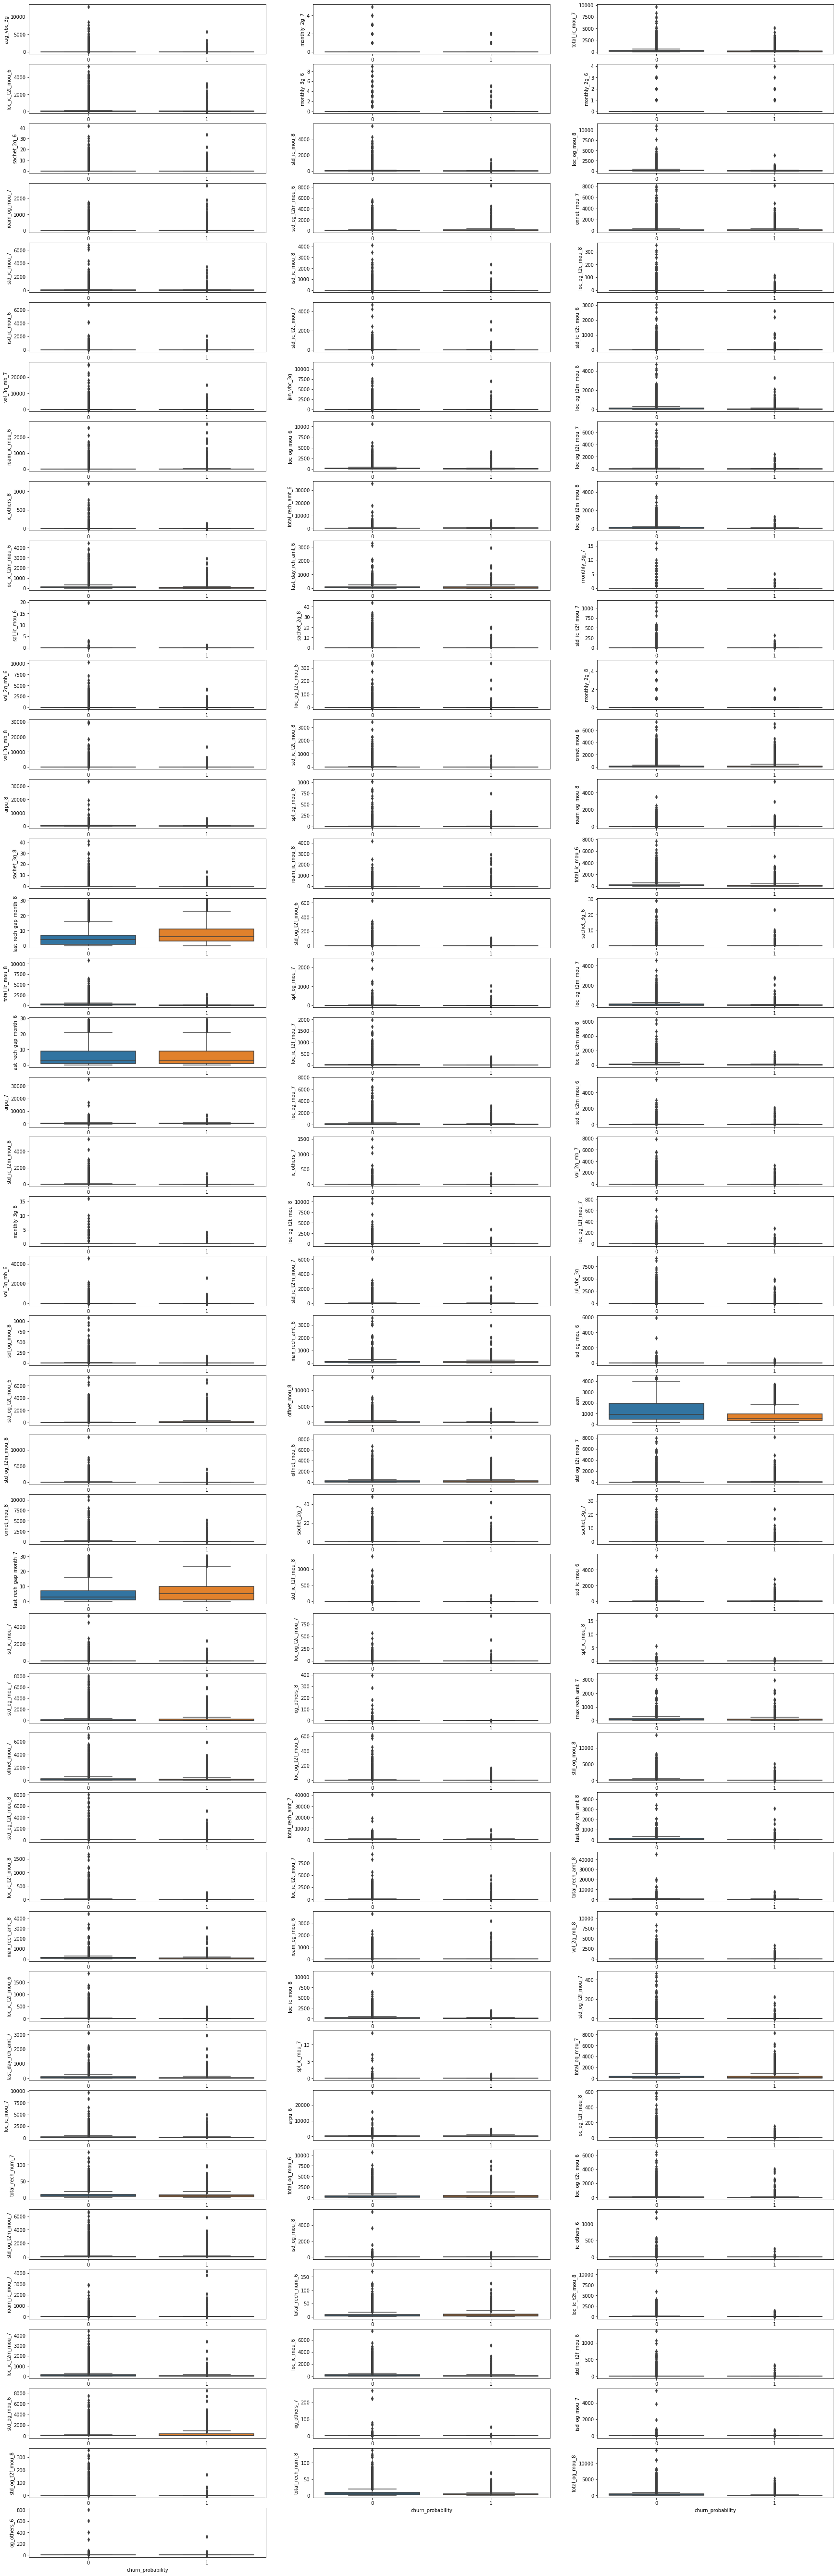

In [32]:
display_bulk_box_plot(df=churn_df,num_cols=num_cols,target_col=target_col)

Observation:

1. As per the Boxplot of all features except few contain outlier datapoints.
2. Q3 value of three new derived feature last_rech_gap_month_8,last_rech_gap_month_7 and last_rech_gap_month_6 are high for churn customer 
3. IQR range of aon feature is low for churn customer

In [33]:
def display_corr_heatmap(df) :

  # naive way 
  corr = df.corr()

  # corr
  plt.figure(figsize=(50,50))
  # Triangle Matrix
  mask = np.triu(np.ones_like(corr, dtype=np.bool))

  sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], mask=mask,
              cmap='PiYG', vmax=1.0, vmin=-1.0, 
              square=True);
    

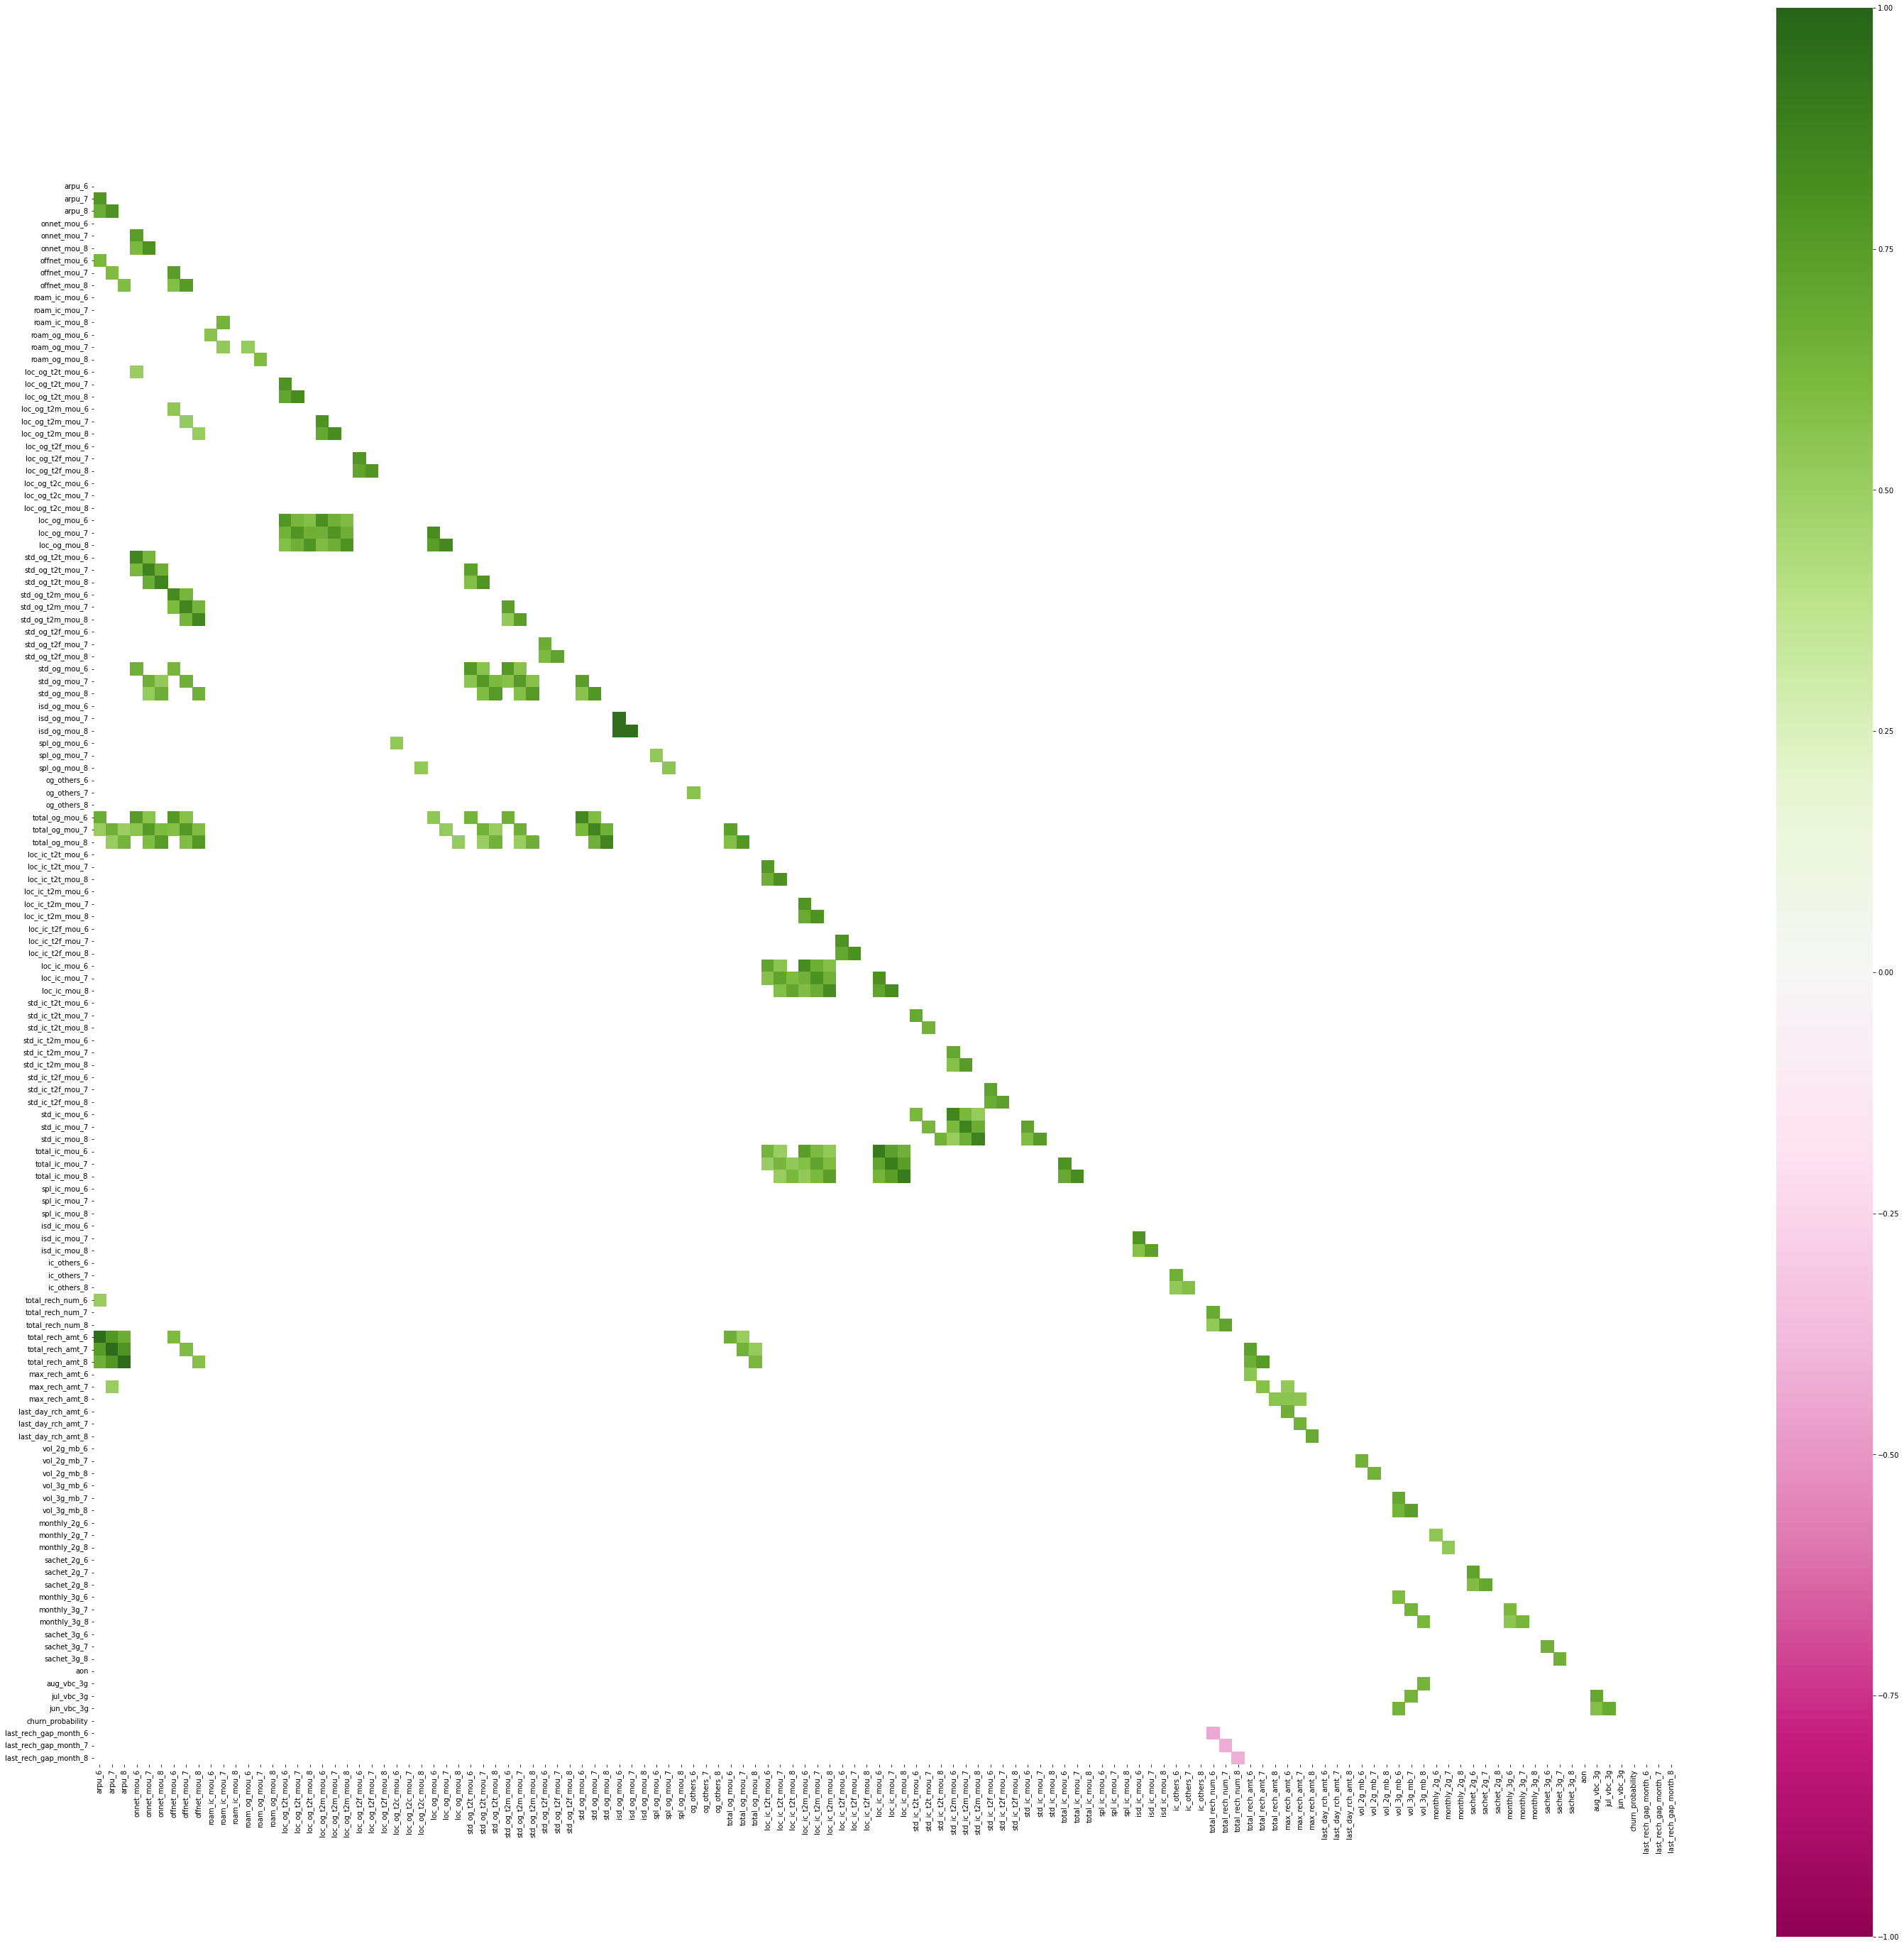

In [34]:
# plotting correlations on a heatmap
display_corr_heatmap(churn_df)

observation : many indepedent features are colinear to each other.

#### Outlier Treatment :

In [35]:
# since random forest is not sensitive to outlier, so keeping seperate copy of churn dataset
churn_df_w_outlier =  churn_df.copy()

In [36]:
# function to return upper limit & lower limit 
def outlier_val_func(x,q1,q3,iqr) :
  if x > q3+1.5*iqr :
    return q3+0.99*iqr
  elif x < q1-1.5*iqr :
    return  q1-0.99*iqr
  else :
    return x

# it is not wise to remove outlier,
# replacing higher & lower value with q3+0.99IQR and q1-0.99IQR
def outlier_rplc(df,func_rplc) :
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  iqr=q3-q1
  return df.apply(lambda x : func_rplc(x,q1,q3,iqr))

In [37]:
for col in num_cols :
  churn_df[col]=outlier_rplc(churn_df[col],outlier_val_func)

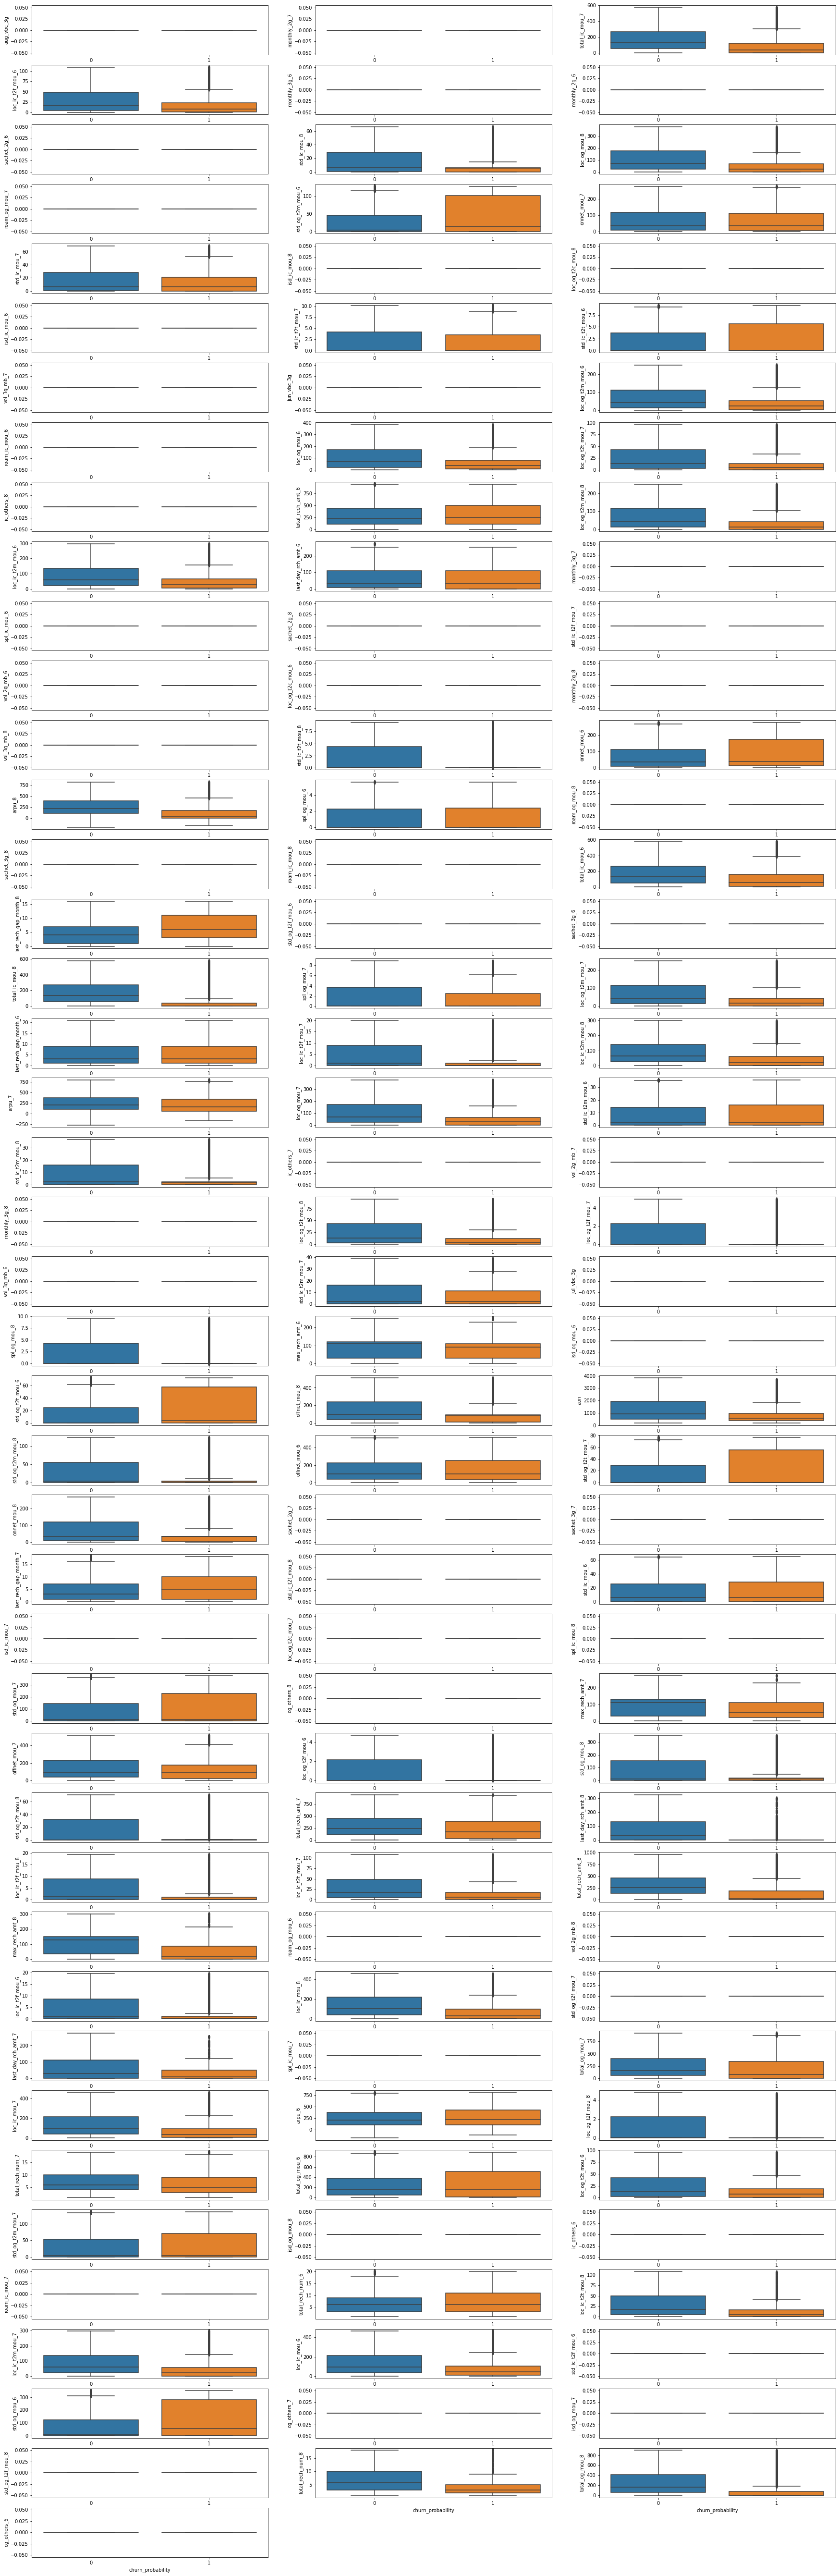

In [38]:
# box plot after removing outlier
display_bulk_box_plot(churn_df,num_cols,target_col)

observation :
1. after comparing of boxplot before and after treatment of outlier, we can see that boxplot of many feature against curn_probabibility have meaningful meaning. It is visible clearly.

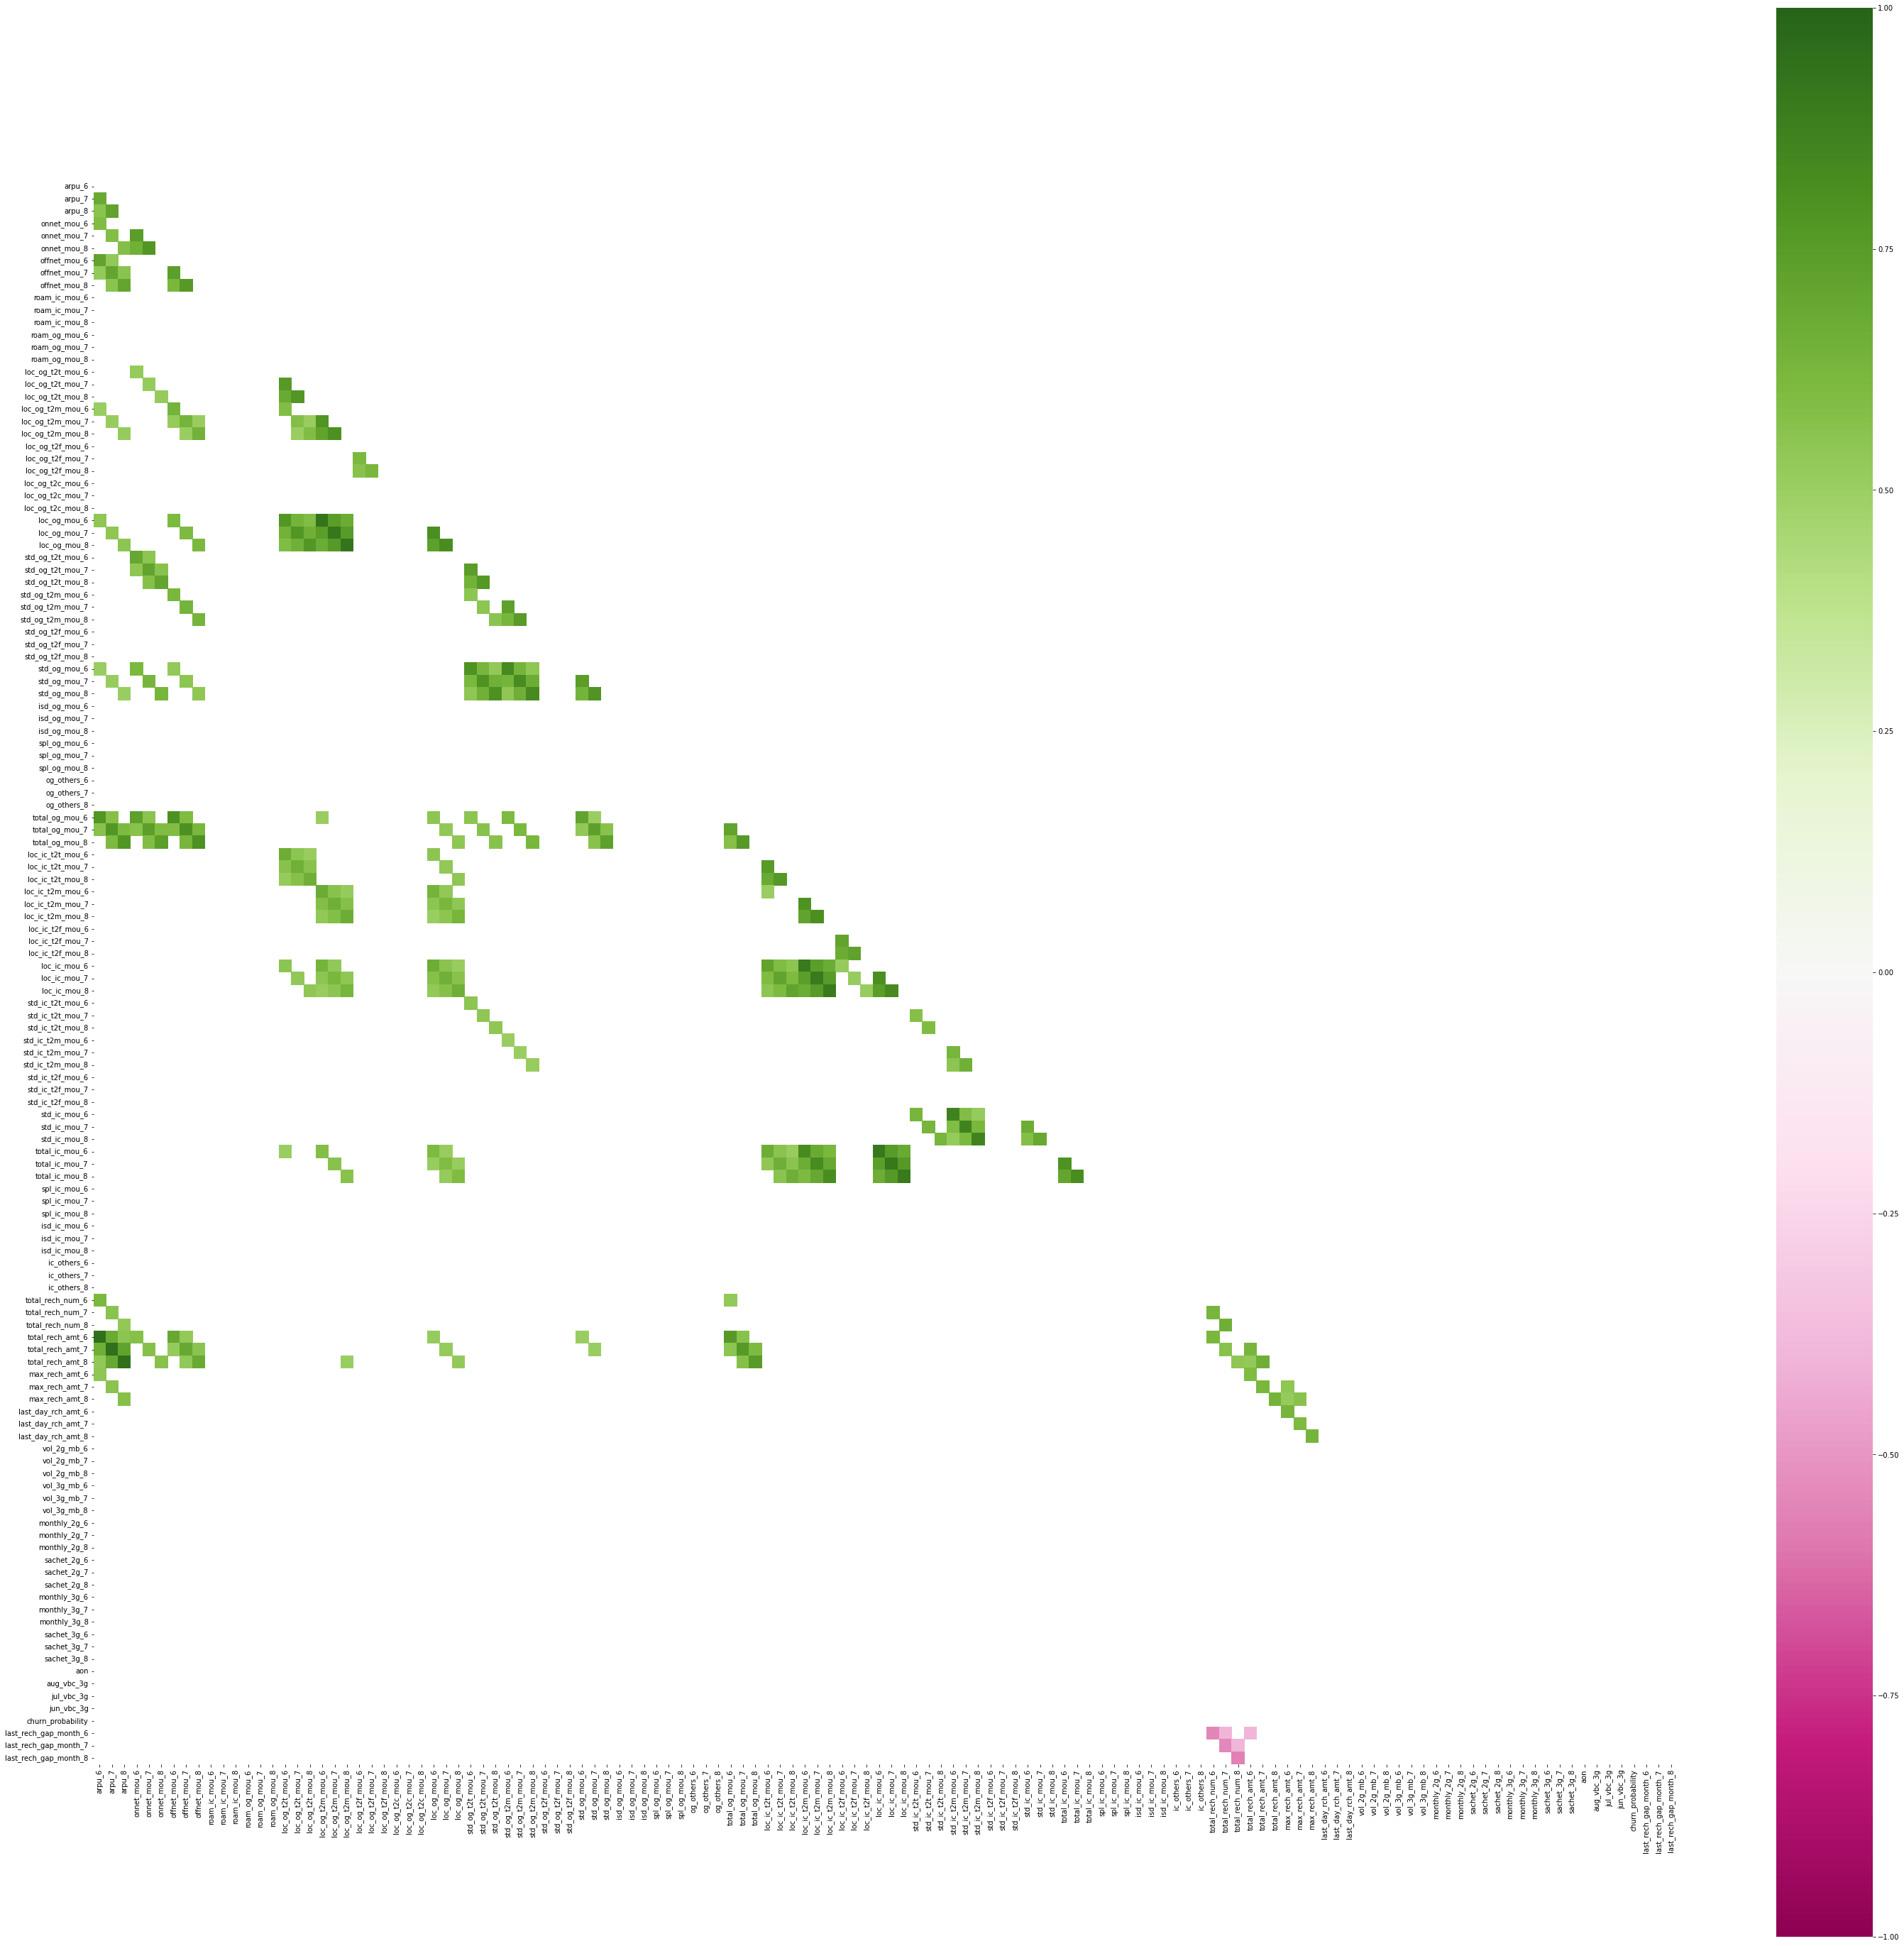

In [39]:
# plotting correlations on a heatmap after outlier removal 

display_corr_heatmap(churn_df)

In [40]:
dist_df=churn_df.describe().transpose()
dist_df

,count,mean,std,min,25%,50%,75%,max
arpu_6,65945.0,257.157602,203.906808,-183.33125,95.329,201.673,376.804,798.909
arpu_7,65945.0,256.623920,203.646135,-275.79900,94.529,200.707,375.538,797.034
arpu_8,65945.0,258.118061,207.734017,-197.95700,93.127,202.185,381.206,813.148
onnet_mou_6,65945.0,71.936974,81.161684,0.00000,7.980,34.410,116.160,278.380
onnet_mou_7,65945.0,71.417369,81.278564,0.00000,7.440,33.530,115.390,277.310
onnet_mou_8,65945.0,69.507755,78.784154,0.00000,7.460,33.030,112.010,268.830
offnet_mou_6,65945.0,148.780186,141.554724,0.00000,36.460,96.680,228.490,516.410
offnet_mou_7,65945.0,147.764561,142.310984,0.00000,34.610,94.390,227.190,515.960
offnet_mou_8,65945.0,146.698005,141.181960,0.00000,34.690,94.250,225.590,511.940
roam_ic_mou_6,65945.0,0.000000,0.000000,0.00000,0.000,0.000,0.000,0.000


In [41]:
#features which became zero after outlier treament
zero_cols=dist_df[dist_df['max']==dist_df['min']].index
zero_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object')

In [42]:
# it is not advise to pass those feature to model so dropping these features
churn_df.drop(columns=zero_cols,axis=1,inplace=True)

In [43]:
# final shape of dataset of which outlier treatment done
churn_df.shape

(65945, 77)

### High Value Customer using Customer Segmentation (Kmean Clustering)

Points : 

1. We have given different usage, recharge amount and total number of recharge for span of 6,7 and 8 month. When customer start to spend less then it is most probable chance to churn out. It means customer will not generate good revenue in last month. So particular customer generate good revenue or not it is decided how much he/she is spending money in initial months. Here  6 and 7 are initial months and 8 is the last month
2. We will take total recharge number, total recharge amount and max recharge amount of 6th and 7th month for clustering 

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [45]:
# since clustering is sensitive to outlier so we choosed outlier treated dataset
# taking total recharge number, total recharge amount and max recharge amount of month 6 and 7.
clust_attr=churn_df[['total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7','max_rech_amt_6','max_rech_amt_7']]

In [46]:
# scaling for K-mean clustering
clust_scaler= StandardScaler()
clust_attr[clust_attr.columns]= clust_scaler.fit_transform(clust_attr[clust_attr.columns])

In [47]:
# finding hopkin value to find out cluster is posible or not
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [48]:
# hopkins value is good , It means dataset contains cluster.
hopkins(clust_attr)

0.8643150324341105

In [49]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=1)
    kmeans.fit(clust_attr)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(clust_attr, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.33792778026952774
For n_clusters=3, the silhouette score is 0.3124116713891035
For n_clusters=4, the silhouette score is 0.2686163947518635
For n_clusters=5, the silhouette score is 0.26180401708942175


In [50]:
# taking n_cluster =3
kmean = KMeans(n_clusters=3, max_iter=50,random_state=1)
kmean.fit(clust_attr)

KMeans(max_iter=50, n_clusters=3, random_state=1)

In [51]:
clust_attr['cluster_label']=kmean.labels_

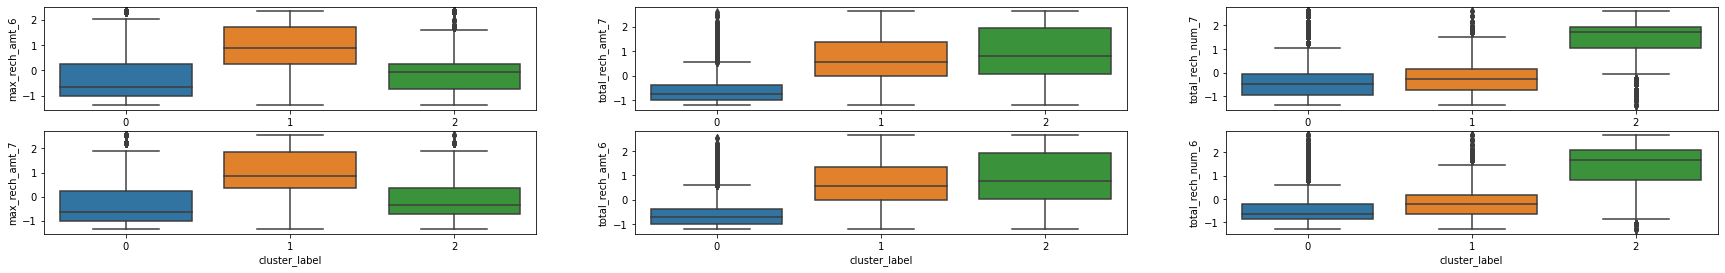

In [52]:
display_bulk_box_plot(clust_attr,(set(clust_attr.columns)-set(['cluster_label'])),'cluster_label')

observation :

1. Cluster 0 is clearly saperate from other clusters. It is formed with (low value of max recharge amount, low value of total recharge amount, low value of total recharge number.

2. Cluster 1 and 2 are somewhat overlapping each other. These two cluster relatively contains higher side.
3. Cluster 0 is very low revenue generater customers.

In [53]:
# assign cluster label to churn dataset
churn_df['cluster_label'] = kmean.labels_

#take cluster 1 and 2 which is high value customers
churn_df=churn_df[(churn_df['cluster_label']==1) | (churn_df['cluster_label']==2)]

In [54]:
churn_df.shape

(30543, 78)

In [55]:
# then droping cluster_label column
churn_df.drop(columns=['cluster_label'],axis=1,inplace=True)

In [56]:
# churn rate in high value customer
churn_df[churn_df.churn_probability==1].shape[0]*100/churn_df.shape[0]

7.271715286645057

In [75]:
# saving data in disk 
churn_df.to_csv("cleaned_high_profile_churn.csv",index=False)

### Preparing dataset for model :

#### Train & Test set split :

In [57]:
# Preparing Test and Train set
df_train, df_test = train_test_split(churn_df,stratify=churn_df[target_col],train_size = 0.7, 
                                     test_size = 0.3, random_state = 1)

#### Scaling Numerical Features

In [58]:
std_scaler = StandardScaler()

In [59]:
## first fit on train dataset and then transform
num_features = df_train.drop(columns=[target_col],axis=1).columns
df_train[num_features]=std_scaler.fit_transform(df_train[num_features])
## sacaling the test data set using same std_scale
df_test[num_features]=std_scaler.transform(df_test[num_features])

#### Feature & Target Saperation :

In [60]:
#function to seperate features & target columns.
def get_feature_and_target(df) :
  features=df.drop(columns=['churn_probability'],axis=1)
  target = df['churn_probability']
  return features,target

In [61]:
# xtrain and ytrain
Xtrain,ytrain=get_feature_and_target(df_train)
# xtest and ytest
Xtest,ytest=get_feature_and_target(df_test)

print("shape of X train ==> ",Xtrain.shape)
print("shape of y train ==> ",ytrain.shape)
print("shape of X test ==> ",Xtest.shape)
print("shape of y test ==> ",ytest.shape)

shape of X train ==>  (21380, 76)
shape of y train ==>  (21380,)
shape of X test ==>  (9163, 76)
shape of y test ==>  (9163,)


### Classfication Model Building :

#### Adaboost & Hyper Parameter Tunining

In [62]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is requi

In [64]:
params = {'n_estimators': [50,100,150,200,300,400],
          "learning_rate":[0.001,0.01,0.1,1.0]
          }

# Create a shallow tree as weak learner
# using class_weight to handle inbalance class dataset
tree_stump = DecisionTreeClassifier(max_depth=1,class_weight='balanced',random_state = 1)

ada_boost = AdaBoostClassifier(base_estimator=tree_stump,random_state=1)

# cross validation
folds=5
ada_boost_cv = GridSearchCV(estimator = ada_boost,
                        param_grid = params, 
                        scoring= 'accuracy',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

ada_boost_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_depth=1,
                                                                                random_state=1),
                                          random_state=1),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150, 200, 300, 400]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [73]:
ada_boost_cv_df = pd.DataFrame(ada_boost_cv.cv_results_)
ada_boost_cv_df.sort_values(by=['rank_test_score']).head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
23,49.311489,1.519192,0.442411,0.078865,1.0,400,"{'learning_rate': 1.0, 'n_estimators': 400}",0.884238,0.878391,0.878391,0.878157,0.881899,0.880215,0.002446,1,0.900374,0.898152,0.900783,0.898620,0.900667,0.899719,0.001106
22,36.337434,0.486957,0.363232,0.076025,1.0,300,"{'learning_rate': 1.0, 'n_estimators': 300}",0.881197,0.874883,0.873246,0.878391,0.881431,0.877830,0.003296,2,0.896574,0.892481,0.894060,0.894177,0.896983,0.894855,0.001686
21,24.414224,0.413172,0.224086,0.040952,1.0,200,"{'learning_rate': 1.0, 'n_estimators': 200}",0.879093,0.869270,0.869504,0.867867,0.877689,0.872685,0.004714,3,0.886927,0.885115,0.883887,0.885465,0.887746,0.885828,0.001363
17,49.462867,1.506666,0.456848,0.082520,0.1,400,"{'learning_rate': 0.1, 'n_estimators': 400}",0.877689,0.868101,0.869738,0.863424,0.871843,0.870159,0.004676,4,0.874708,0.871609,0.873597,0.875175,0.876169,0.874252,0.001559
20,18.808236,0.740159,0.215016,0.054284,1.0,150,"{'learning_rate': 1.0, 'n_estimators': 150}",0.874649,0.870674,0.865996,0.863424,0.874415,0.869832,0.004488,5,0.883244,0.879560,0.878216,0.880613,0.884062,0.881139,0.002204
16,36.387315,0.423282,0.372104,0.078530,0.1,300,"{'learning_rate': 0.1, 'n_estimators': 300}",0.875819,0.867166,0.866698,0.862254,0.872077,0.868803,0.004689,6,0.871141,0.868627,0.872486,0.872135,0.875117,0.871901,0.002099


In [76]:
# best param but no difference much of accuracy if we choose 300 estimator
ada_boost_cv.best_params_

{'learning_rate': 1.0, 'n_estimators': 400}

In [81]:
def get_scores(confusion) :
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    tpr=sensitivity=recall=TP/(TP+FN)
    fpr=FP/(TN+FP)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    return accuracy,precision,recall,specificity,sensitivity

def print_score(estimator,X_train,y_train,X_test,y_test) :
  accuracy_tr,precision_tr,recall_tr,specificity_tr,sensitivity_tr = get_scores(confusion_matrix(y_train,
                                                                                                 estimator.predict(X_train)))

  accuracy_tst,precision_tst,recall_tst,specificity_tst,sensitivity_tst = get_scores(confusion_matrix(y_test,
                                                                                                 estimator.predict(X_test)))
  
  print("train accuracy : ",accuracy_tr)
  print("train precision : ",precision_tr)
  print("train recall : ",recall_tr)
  print("train specificity : ",specificity_tr)
  print("train sensitivity : ",sensitivity_tr)

  print("test accuracy : ",accuracy_tst)
  print("test precision : ",precision_tst)
  print("test recall : ",recall_tst)
  print("test specificity : ",specificity_tst)
  print("test sensitivity : ",sensitivity_tst)

In [85]:
# print adaboost_score
print_score(ada_boost_cv.best_estimator_,Xtrain,ytrain,Xtest,ytest)

train accuracy :  0.8904583723105707
train precision :  0.3875392969419834
train recall :  0.8720257234726688
train specificity :  0.8919041614123582
train sensitivity :  0.8720257234726688
test accuracy :  0.881479864673142
test precision :  0.35232067510548526
test recall :  0.7522522522522522
test specificity :  0.891608803106979
test sensitivity :  0.7522522522522522


In [92]:
# important feature 
features_cols_name = list(Xtrain.columns)
feature_importance_score=list(ada_boost_cv.best_estimator_.feature_importances_)
model_parameters=sorted(list(zip(features_cols_name,feature_importance_score)), key=lambda x:abs(x[1]), reverse=True)
model_parameters[0:30]

[('loc_ic_t2t_mou_7', 0.04),
 ('loc_ic_mou_8', 0.0375),
 ('total_ic_mou_8', 0.0375),
 ('loc_ic_t2m_mou_7', 0.03),
 ('loc_og_t2t_mou_8', 0.0275),
 ('offnet_mou_8', 0.025),
 ('total_ic_mou_7', 0.025),
 ('total_rech_amt_8', 0.025),
 ('arpu_7', 0.0225),
 ('std_og_mou_6', 0.0225),
 ('loc_ic_t2t_mou_6', 0.0225),
 ('total_ic_mou_6', 0.0225),
 ('last_rech_gap_month_8', 0.0225),
 ('onnet_mou_7', 0.02),
 ('offnet_mou_6', 0.02),
 ('loc_og_t2m_mou_8', 0.02),
 ('loc_og_mou_6', 0.02),
 ('loc_og_mou_8', 0.02),
 ('total_og_mou_8', 0.02),
 ('loc_ic_t2m_mou_8', 0.02),
 ('std_ic_mou_6', 0.0175),
 ('std_ic_mou_7', 0.0175),
 ('max_rech_amt_8', 0.0175),
 ('last_day_rch_amt_8', 0.0175),
 ('aon', 0.0175),
 ('arpu_8', 0.015),
 ('loc_og_t2t_mou_7', 0.015),
 ('loc_og_t2m_mou_6', 0.015),
 ('spl_og_mou_7', 0.015),
 ('loc_ic_t2f_mou_6', 0.015)]

observation :
1. as we can see top 5 important features deciding churing are related to incoming local call.

#### Gradient Boosting & Hyperparameter Tunining

In [80]:
gb=GradientBoostingClassifier(random_state=1)
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [88]:
params = {'n_estimators': [800],
          "learning_rate":[0.001,0.01,0.1,1.0],
          "subsample":[0.7,0.8],
          "max_features":['sqrt','log2'],
          "max_depth":[8,11,13],
          }


# using class_weight to handle inbalance class dataset

gb = GradientBoostingClassifier()

# cross validation
folds=5
gb_boost_cv = GridSearchCV(estimator = gb,
                        param_grid = params, 
                        scoring= 'accuracy',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

gb_boost_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [8, 11, 13],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [800], 'subsample': [0.7, 0.8]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [89]:
# see gb cv result
gb_boost_df = pd.DataFrame(gb_boost_cv.cv_results_)
gb_boost_df.sort_values(by=['rank_test_score']).head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
12,57.221461,0.812451,0.183669,0.018152,0.01,8,sqrt,800,0.7,"{'learning_rate': 0.01, 'max_depth': 8, 'max_f...",0.942470,0.943873,0.940365,0.945510,0.941768,0.942797,0.001766,1,0.993159,0.992049,0.992809,0.992809,0.992750,0.992715,0.000363
13,63.818346,0.872284,0.180998,0.016078,0.01,8,sqrt,800,0.8,"{'learning_rate': 0.01, 'max_depth': 8, 'max_f...",0.942937,0.943405,0.939897,0.944808,0.942236,0.942657,0.001616,2,0.993803,0.992926,0.993452,0.993393,0.993686,0.993452,0.000303
17,96.239319,0.603627,0.261115,0.001858,0.01,11,sqrt,800,0.8,"{'learning_rate': 0.01, 'max_depth': 11, 'max_...",0.943171,0.942236,0.940365,0.945744,0.941534,0.942610,0.001815,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
21,126.409690,1.474167,0.355585,0.007130,0.01,13,sqrt,800,0.8,"{'learning_rate': 0.01, 'max_depth': 13, 'max_...",0.942937,0.943639,0.939897,0.945276,0.940599,0.942470,0.001979,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
22,96.269053,1.111036,0.373932,0.019042,0.01,13,log2,800,0.7,"{'learning_rate': 0.01, 'max_depth': 13, 'max_...",0.943171,0.943639,0.938728,0.944808,0.941300,0.942329,0.002126,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
20,113.685738,2.678731,0.347911,0.005904,0.01,13,sqrt,800,0.7,"{'learning_rate': 0.01, 'max_depth': 13, 'max_...",0.943873,0.943405,0.940365,0.945276,0.938728,0.942329,0.002410,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [90]:
# see gb cv best param
gb_boost_cv.best_params_

{'learning_rate': 0.01,
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 800,
 'subsample': 0.7}

In [93]:
# print adaboost_score
print_score(gb_boost_cv.best_estimator_,Xtrain,ytrain,Xtest,ytest)

train accuracy :  0.9897567820392891
train precision :  0.9977645305514158
train recall :  0.8610932475884244
train specificity :  0.9998486759142496
train sensitivity :  0.8610932475884244
test accuracy :  0.9466331987340391
test precision :  0.7322834645669292
test recall :  0.4189189189189189
test specificity :  0.9879957632105449
test sensitivity :  0.4189189189189189


observation : 

we cleary can compare previous Adaboost that Gradient boosting perfomed better also it provided more meaningful features

In [94]:
# gb important feature 
features_cols_name = list(Xtrain.columns)
feature_importance_score=list(gb_boost_cv.best_estimator_.feature_importances_)
model_parameters=sorted(list(zip(features_cols_name,feature_importance_score)), key=lambda x:abs(x[1]), reverse=True)
model_parameters[0:30]

[('total_ic_mou_8', 0.07868262962918644),
 ('arpu_8', 0.05775369662381579),
 ('total_og_mou_8', 0.047897231155637356),
 ('total_rech_amt_8', 0.03936473389011327),
 ('loc_ic_mou_8', 0.033290806316358286),
 ('max_rech_amt_8', 0.03227678830413837),
 ('last_day_rch_amt_8', 0.029505430106101852),
 ('loc_ic_t2m_mou_8', 0.027937474560427063),
 ('last_rech_gap_month_8', 0.02518493757830122),
 ('offnet_mou_8', 0.018858518209572152),
 ('loc_og_mou_8', 0.015614184514043785),
 ('aon', 0.015498899551114786),
 ('total_rech_num_7', 0.014873796038735237),
 ('loc_ic_t2t_mou_8', 0.014791971299661503),
 ('arpu_7', 0.0146811227107061),
 ('arpu_6', 0.013709617352740363),
 ('loc_og_t2m_mou_8', 0.01355293004403772),
 ('loc_ic_t2m_mou_7', 0.013226989541189718),
 ('total_ic_mou_7', 0.013210107198529865),
 ('std_ic_mou_8', 0.012945094610979693),
 ('total_rech_amt_7', 0.012776107954565422),
 ('total_ic_mou_6', 0.012735038138753114),
 ('onnet_mou_8', 0.012688523046681697),
 ('loc_ic_mou_7', 0.012200156906105637),

##### Prediction test file

In [122]:
# defining preprocessing step for test file
def predict_test(df,estimator) :
  date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
  # datetime conversion
  for col in date_cols :
    df[col]=pd.to_datetime(df[col])

  df['last_rech_gap_month_6'] = (df['last_date_of_month_6']-df['date_of_last_rech_6']).astype('timedelta64[D]')
  df['last_rech_gap_month_7'] = (df['last_date_of_month_7']-df['date_of_last_rech_7']).astype('timedelta64[D]')
  df['last_rech_gap_month_8'] = (df['last_date_of_month_8']-df['date_of_last_rech_8']).astype('timedelta64[D]')
  
  test_df_=df[Xtrain.columns.to_list()]

  test_df_=test_df_.fillna(0)

  ## scale the feature
  test_df_[num_features]=std_scaler.transform(test_df_[num_features])

  # prediction 
  y_pred=estimator.predict(test_df_)

  output_df = pd.DataFrame({"id":df.id,"churn_probability":y_pred})
  return output_df

In [124]:
#  prediction with gradient boosting
test_churn_df=pd.read_csv("telecome_churn_test.csv")

In [113]:
output_df=predict_test()

In [128]:
date_cols_ = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
             'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
  # datetime conversion
for col in date_cols_ :
  test_churn_df[col]=pd.to_datetime(test_churn_df[col])

test_churn_df['last_rech_gap_month_6'] = (test_churn_df['last_date_of_month_6']-test_churn_df['date_of_last_rech_6']).astype('timedelta64[D]')
test_churn_df['last_rech_gap_month_7'] = (test_churn_df['last_date_of_month_7']-test_churn_df['date_of_last_rech_7']).astype('timedelta64[D]')
test_churn_df['last_rech_gap_month_8'] = (test_churn_df['last_date_of_month_8']-test_churn_df['date_of_last_rech_8']).astype('timedelta64[D]')
  
test_df_=test_churn_df[Xtrain.columns.to_list()]
test_df_=test_df_.fillna(0)
  ## scale the feature
test_df_[num_features]=std_scaler.transform(test_df_[num_features])

  # prediction 
y_pred=gb_boost_cv.best_estimator_.predict(test_df_)

output_df = pd.DataFrame({"id":test_churn_df.id,"churn_probability":y_pred})

In [129]:
output_df.shape

(30000, 2)

In [130]:
output_df['churn_probability']=output_df['churn_probability'].astype('int64')

In [131]:
output_df.to_csv('submission.csv',index=False)